In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/champions-league-era-stats/PlayerAppearDetails.csv
/kaggle/input/champions-league-era-stats/AllTimeRankingByClub.csv
/kaggle/input/champions-league-era-stats/TopGoalScorer.csv
/kaggle/input/champions-league-era-stats/PlayerGoalTotals.csv
/kaggle/input/champions-league-era-stats/PlayerGoalDetails.csv
/kaggle/input/champions-league-era-stats/CoachesAppearTotals.csv
/kaggle/input/champions-league-era-stats/CoachesAppearDetails.csv
/kaggle/input/champions-league-era-stats/GoalStatsPerGroupRound.csv
/kaggle/input/champions-league-era-stats/AllTimeRankingByCountry.csv
/kaggle/input/champions-league-era-stats/PlayerAppearTotals.csv


In [2]:
PATH = "/kaggle/input/champions-league-era-stats"

# The country with the most clubs to participate in the Champions League
Lets analyze the AllTimeRankingByClub which is the more detailed file.  The All Time RankingByCountry is the summary file which removes the club names and just adds up  the numbers per country.

You can use this dictionary if you'd like to convert between the country code and country name:

In [3]:
country_dict = { "ESP": "Spain", "ENG": "England", "ITA" :"Italy", "GER":"Germany", "POR": "Portugal",
               "FRA":"France", "NED":"Netherlands", "POL":"Poland", "ROU":"Romania", "RUS":"Russia", 
               "AUT":"Austria", "SCO":"Scotland", "SRB":"Serbia", "SUI":"Switzerland", "SVK":"Slovakia",
               "SVN":"SLovenia", "TUR":"Turkey", "NOR":"Norway", "ISR":"Israel", "KAZ":"Kazakhstan", 
               "AZE":"Azerbaijan", "HUN":"Hungary", "GRE":"Greece", "FIN":"Finland", "DEN":"Denmark", 
                "SWE": "Swedend", "CZE":"Czech Republic", "CYP":"Cyprus", "CRO": "Croatia", "BUL":"Bulgaria", 
                "BLR":"Belarus", "BEL":"Belguim", "UKR":"Ukraine", "MDV":"Moldova"}

In [4]:
AllTimeClub = pd.read_csv(os.path.join(PATH, "AllTimeRankingByClub.csv"), encoding='utf-16')
AllTimeClub.columns

Index(['Position', 'Club', 'Country', 'Participated', 'Titles', 'Played',
       'Win', 'Draw', 'Loss', 'Goals For', 'Goals Against', 'Pts',
       'Goal Diff'],
      dtype='object')

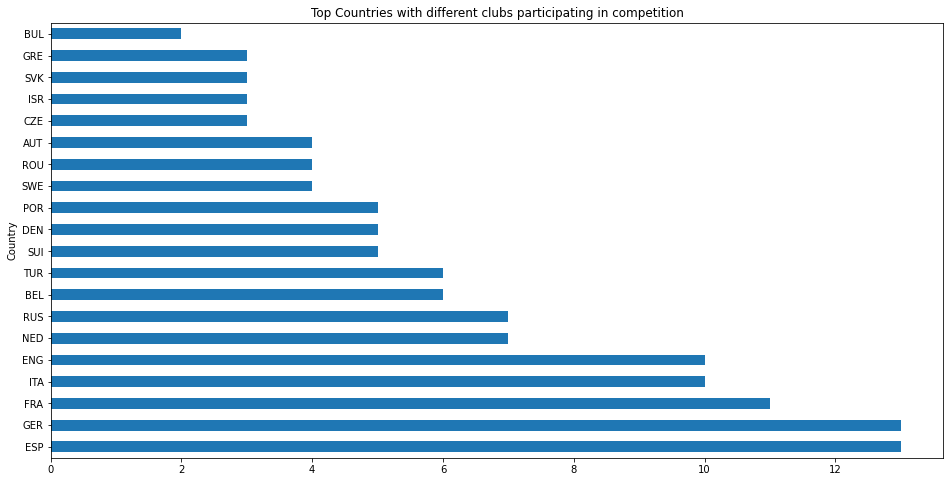

In [5]:
df = AllTimeClub.copy(deep=True)
plt.figure(figsize=(16,8))
plt.title("Top Countries with different clubs participating in competition")
df = df.groupby("Country")["Club"].count().sort_values(ascending=False)[:20].plot(kind='barh')

With the domination of the spanish clubs in the last decade I expected them to be in the top but the German clubs are a surprise for me. Even though both leagues have been dominated by a few clubs (2 in Spain and mostly 1 in Germany) it looks like overall the competition produces more balanced results for their clubs compared  other leagues by sending different clubs to Europe's top club competition

# Top scoring clubs per game in the competition

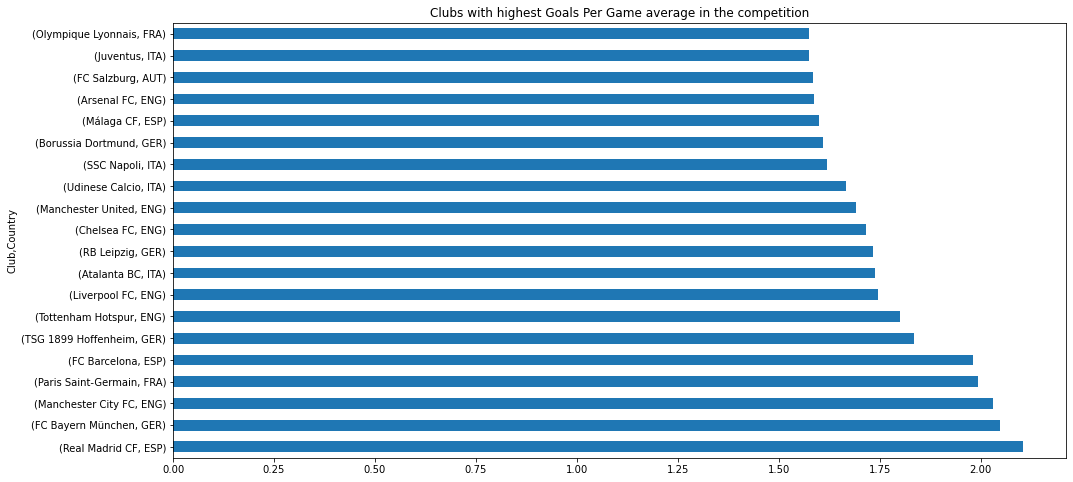

In [6]:
df = AllTimeClub.copy(deep=True)
df["GPG"] = df["Goals For"] / df["Played"]
plt.figure(figsize=(16,8))
plt.title("Clubs with highest Goals Per Game average in the competition")
df = df.groupby(["Club", "Country"])["GPG"].max().sort_values(ascending=False)[:20].plot(kind='barh')

This list has more surprising results than the country list.  PSG, Manchester City, Hoffenheim & Tottenham were not teams I was expecting to see so high in the list. Obviously the less games you participate in, while scoring many goals in those few games skews the results.  Lets confirm

So lets look at those clubs and how many games have they played or have participated in the competition.

In [7]:
df = AllTimeClub.copy(deep=True)
df["GPG"] = df["Goals For"] / df["Played"]
df = df.groupby("Club")["GPG"].max().sort_values(ascending=False)[:20]
AllTimeClub.loc[AllTimeClub["Club"].isin(df.index.tolist())]

,Position,Club,Country,Participated,Titles,Played,Win,Draw,Loss,Goals For,Goals Against,Pts,Goal Diff
0,1,Real Madrid CF,ESP,26,7,285,170,54,61,600,310.0,394.0,290.0
1,2,FC Barcelona,ESP,26,4,271,158,64,49,537,274.0,380.0,263.0
2,3,FC Bayern München,GER,25,3,268,157,54,57,549,274.0,368.0,275.0
3,4,Manchester United,ENG,24,2,236,124,58,54,399,228.0,306.0,171.0
4,5,Juventus,ITA,22,1,212,109,52,51,334,209.0,270.0,125.0
5,6,Chelsea FC,ENG,18,2,183,93,51,39,314,166.0,237.0,148.0
7,8,Arsenal FC,ENG,19,0,177,83,41,53,281,205.0,207.0,76.0
9,10,Liverpool FC,ENG,14,2,138,71,34,33,241,134.0,176.0,107.0
10,11,Paris Saint-Germain,FRA,14,0,127,69,24,34,253,146.0,162.0,107.0
11,12,Borussia Dortmund,GER,16,1,138,65,27,46,222,172.0,157.0,50.0


We can see that at least 3 teams have only played once in the competition, while 3 others have participated 5 times or less.  There are many ways to slice and dice this dataset so please enjoy and share some of the interesting findings that you come up with.

In [8]:
del df

# Coach with the most appearances for a single club
We will analyze the CoachesAppearDetails file which has the details broken down by each club that the coach represented.  The CoachsAppearTotals is just the sum of this data without the club represented

In [9]:
CoachAppear = pd.read_csv(os.path.join(PATH, "CoachesAppearDetails.csv"), index_col='Unnamed: 0')
CoachAppear

,Coach,Club,Appearance
0,Sir Alex Ferguson,Manchester United FC,190
1,Arsène Wenger,Arsenal FC,171
2,Arsène Wenger,AS Monaco FC,7
3,Carlo Ancelotti,FC Bayern München,12
4,Carlo Ancelotti,Juventus,10
...,...,...,...
107,Ernesto Valverde,FC Barcelona,28
108,Felix Magath,VfB Stuttgart,8
109,Felix Magath,FC Schalke 04,8
110,Felix Magath,FC Bayern München,24


Lets see who are the coaches with the most appearances with a single club and which club it was

In [10]:
df = CoachAppear.copy(deep=True)
df = df.groupby(["Coach", "Club"])["Appearance"].max().sort_values(ascending=False)[:10]
df

Coach                 Club                   
Sir Alex Ferguson     Manchester United FC       190
Arsène Wenger         Arsenal FC                 171
Diego Simeone         Club Atlético de Madrid     83
Marcello Lippi        Juventus                    76
Ottmar Hitzfeld       FC Bayern München           76
Carlo Ancelotti       AC Milan                    73
Mircea Lucescu        FC Shakhtar Donetsk         68
Rafael Benítez        Liverpool FC                62
Massimiliano Allegri  Juventus                    60
Vicente del Bosque    Real Madrid CF              60
Name: Appearance, dtype: int64

# Coach that represented the most clubs in the competition
And now lets looks at which coach has coached the most clubs in the competition, I expected Ancelotti to be up there but I didn't know that Koeman has coached so many diffeernt clubs, need to brush up on my CL history :)

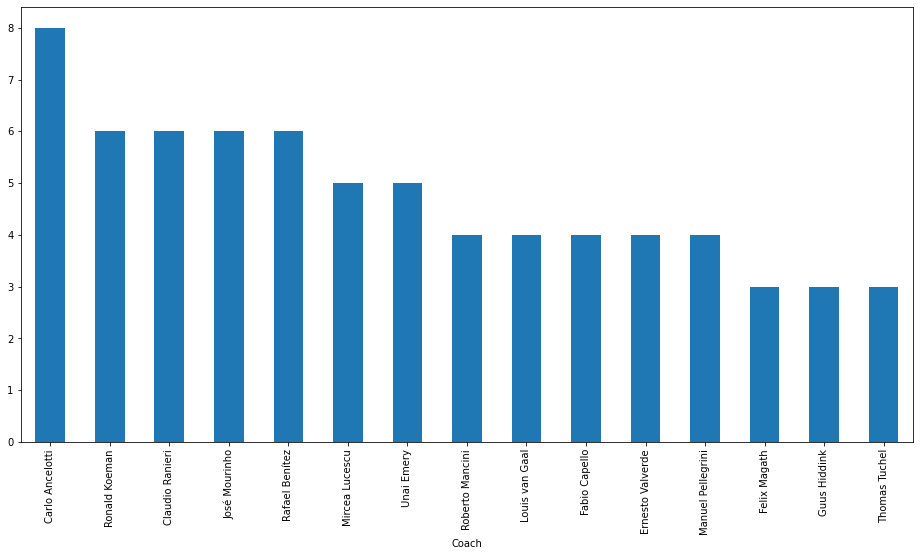

In [11]:
df = CoachAppear.copy(deep=True)
plt.figure(figsize=(16,8))
df = df.groupby(["Coach"])["Club"].count().sort_values(ascending=False)[:15].plot(kind='bar')

In [12]:
del df

# Analyzing the Player appearances
This dataset looks very similar to the coaches data so lets repeat the same analysis.  The player that played the most games for a single club (Note: this player could play for multiple clubs but this is the most games for a club) is:

In [13]:
PlayerAppear = pd.read_csv(os.path.join(PATH, "PlayerAppearDetails.csv"), index_col='Unnamed: 0')
PlayerAppear

,Player,Club,Appearances
0,Cristiano Ronaldo,Real Madrid CF,101
1,Cristiano Ronaldo,Juventus,23
2,Cristiano Ronaldo,Manchester United FC,57
3,Iker Casillas,Real Madrid CF,150
4,Iker Casillas,FC Porto,27
...,...,...,...
643,Mathieu Flamini,AC Milan,13
644,Mathieu Flamini,Arsenal FC,42
645,Paul Pogba,Juventus,32
646,Paul Pogba,Manchester United FC,23


In [14]:
df = PlayerAppear.copy(deep=True)
df = df.groupby(["Player", "Club"])["Appearances"].max().sort_values(ascending=False)[:15]
df

Player            Club                
Xavi Hernández    FC Barcelona            151
Iker Casillas     Real Madrid CF          150
Lionel Messi      FC Barcelona            149
Ryan Giggs        Manchester United FC    141
Andrés Iniesta    FC Barcelona            130
Raúl González     Real Madrid CF          130
Thomas Müller     FC Bayern München       130
Sergio Ramos      Real Madrid CF          129
Sergio Busquets   FC Barcelona            125
Paul Scholes      Manchester United FC    124
Gerard Piqué      FC Barcelona            120
Karim Benzema     Real Madrid CF          116
Carles Puyol      FC Barcelona            115
Gianluigi Buffon  Juventus                113
Gary Neville      Manchester United FC    109
Name: Appearances, dtype: int64

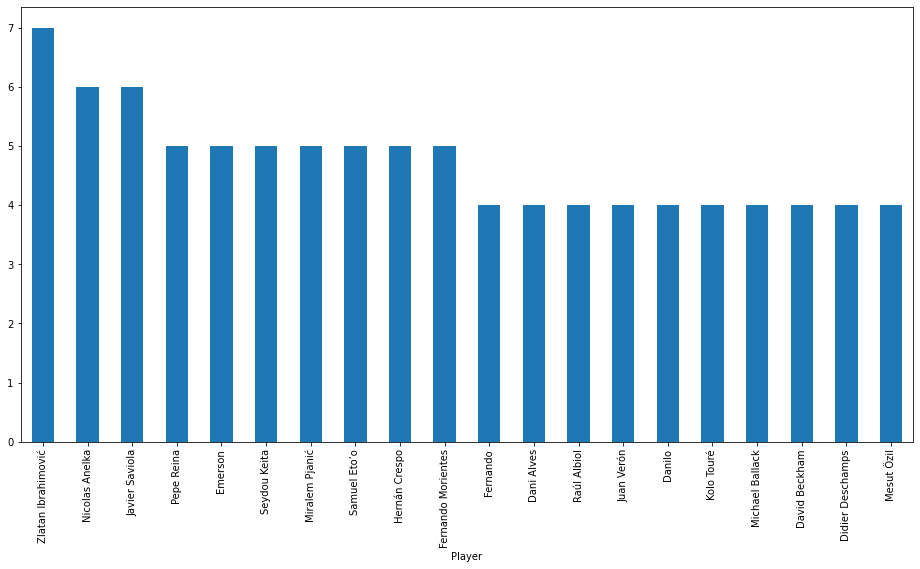

In [15]:
df = PlayerAppear.copy(deep=True)
plt.figure(figsize=(16,8))
df = df.groupby(["Player"])["Club"].count().sort_values(ascending=False)[:20].plot(kind='bar')

# Analyzing the top goal scorers
Lets see which player scored the most goals for a single club by using the PlayerGoalDetails file.  The PlayerGoalTotals is just a summary of this data without the club information.

In [16]:
PlayerGoals = pd.read_csv(os.path.join(PATH, "PlayerGoalDetails.csv"), index_col='Unnamed: 0')
PlayerGoals.head(10)

,Player,Club,Goals
0,Cristiano Ronaldo,Real Madrid CF,105
1,Cristiano Ronaldo,Juventus,14
2,Cristiano Ronaldo,Manchester United FC,21
3,Lionel Messi,FC Barcelona,120
4,Lionel Messi,Paris Saint-Germain,5
5,Robert Lewandowski,Borussia Dortmund,17
6,Robert Lewandowski,FC Bayern München,65
7,Karim Benzema,Olympique Lyonnais,12
8,Karim Benzema,Real Madrid CF,64
9,Raúl González,Real Madrid CF,66


In [17]:
df = PlayerGoals.copy(deep=True)
plt.figure(figsize=(16,8))
df = df.groupby(["Player", "Club"])["Goals"].max().sort_values(ascending=False)[:25]
df

Player                 Club                    
İlkay Gündoğan         Manchester City FC          9
Michael Ballack        Bayer 04 Leverkusen         9
Arturo Vidal           Juventus                    9
Patrick Kluivert       AFC Ajax                    9
Peter Crouch           Liverpool FC                9
Sonny Anderson         Olympique Lyonnais          9
Mario Götze            FC Bayern München           9
Ivica Olić             FC Bayern München           9
Zinédine Zidane        Real Madrid CF              9
Miroslav Klose         FC Bayern München           9
Fernando Morientes     AS Monaco FC                9
Diego Costa            Club Atlético de Madrid     9
Alexis Sánchez         Arsenal FC                  9
Michalis Konstantinou  Panathinaikos FC            9
Zlatan Ibrahimović     AC Milan                    9
Sylvain Wiltord        Olympique Lyonnais          8
Radamel Falcao         AS Monaco FC                8
Jonas                  Valencia CF                 

<Figure size 1152x576 with 0 Axes>

Once again lets look at which player scored the most goals for different clubs

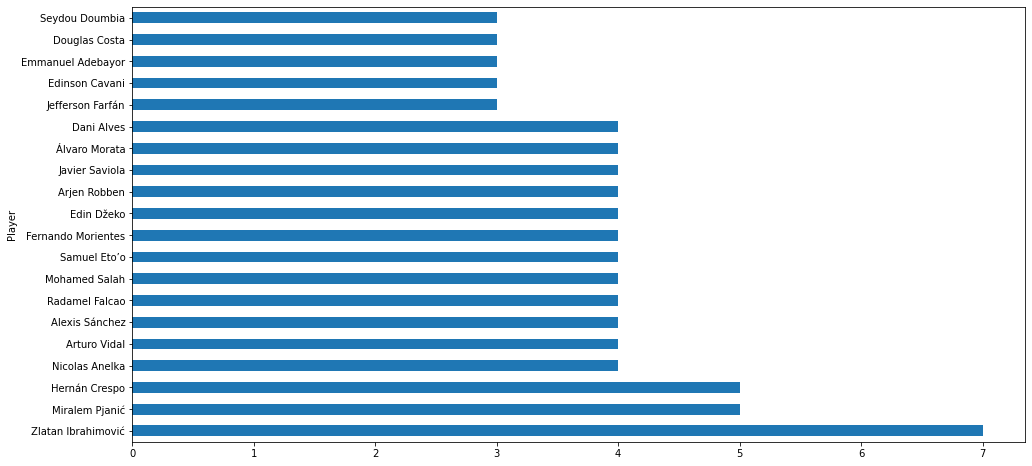

In [18]:
df = PlayerGoals.copy(deep=True)
plt.figure(figsize=(16,8))
df = df.groupby("Player")["Club"].count().sort_values(ascending=False)[:20].plot(kind='barh')